In [8]:
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import cv2 as cv
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

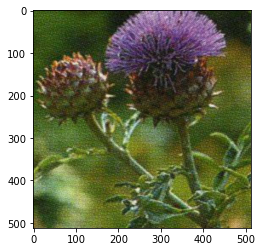

In [9]:
testImage=img.imread('../flowers/artichoke/344.jpeg')
plt.imshow(testImage)

In [10]:
data=[]
label=[]
size=128
FlowerPath='../flowers'        
os.listdir(FlowerPath)
for folder in os.listdir(FlowerPath):
    for file in os.listdir(os.path.join(FlowerPath,folder)):
        if file.endswith("jpeg"):
            label.append(folder)
            img = cv.imread(os.path.join(FlowerPath,folder, file))
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            im = cv.resize(img_rgb, (size,size))
            data.append(im)
            
        else: 
             continue

data_arr = np.array(data)
label_arr = np.array(label)
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,101)
X = data_arr/255




In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [12]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [13]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (size,size,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(size, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(101, activation = "softmax"))






In [14]:

model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=5

checkpoint_path = "modele/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),   
                              verbose = 1,
                              callbacks=[cp_callback])

C:\Users\Mathy\AppData\Local\Temp/ipykernel_16992/1913665676.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),


Epoch 1/5
286/286 [==============================] - ETA: 0s - loss: 4.4571 - accuracy: 0.0575
Epoch 00001: saving model to modele\cp.ckpt
286/286 [==============================] - 263s 912ms/step - loss: 4.4571 - accuracy: 0.0575 - val_loss: 4.1947 - val_accuracy: 0.0924
Epoch 2/5
286/286 [==============================] - ETA: 0s - loss: 4.2164 - accuracy: 0.0825
Epoch 00002: saving model to modele\cp.ckpt
286/286 [==============================] - 243s 850ms/step - loss: 4.2164 - accuracy: 0.0825 - val_loss: 3.9248 - val_accuracy: 0.1161
Epoch 3/5
286/286 [==============================] - ETA: 0s - loss: 4.0456 - accuracy: 0.0982
Epoch 00003: saving model to modele\cp.ckpt
286/286 [==============================] - 234s 817ms/step - loss: 4.0456 - accuracy: 0.0982 - val_loss: 3.7938 - val_accuracy: 0.1279
Epoch 4/5
286/286 [==============================] - ETA: 0s - loss: 3.9223 - accuracy: 0.1021
Epoch 00004: saving model to modele\cp.ckpt
286/286 [==============================

Text(0.5, 1.0, 'Entrainement et Validation')

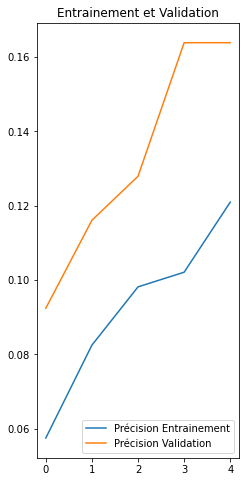

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Précision Entrainement')
plt.plot(epochs_range, val_acc, label='Précision Validation')
plt.legend()
plt.title('Entrainement et Validation')

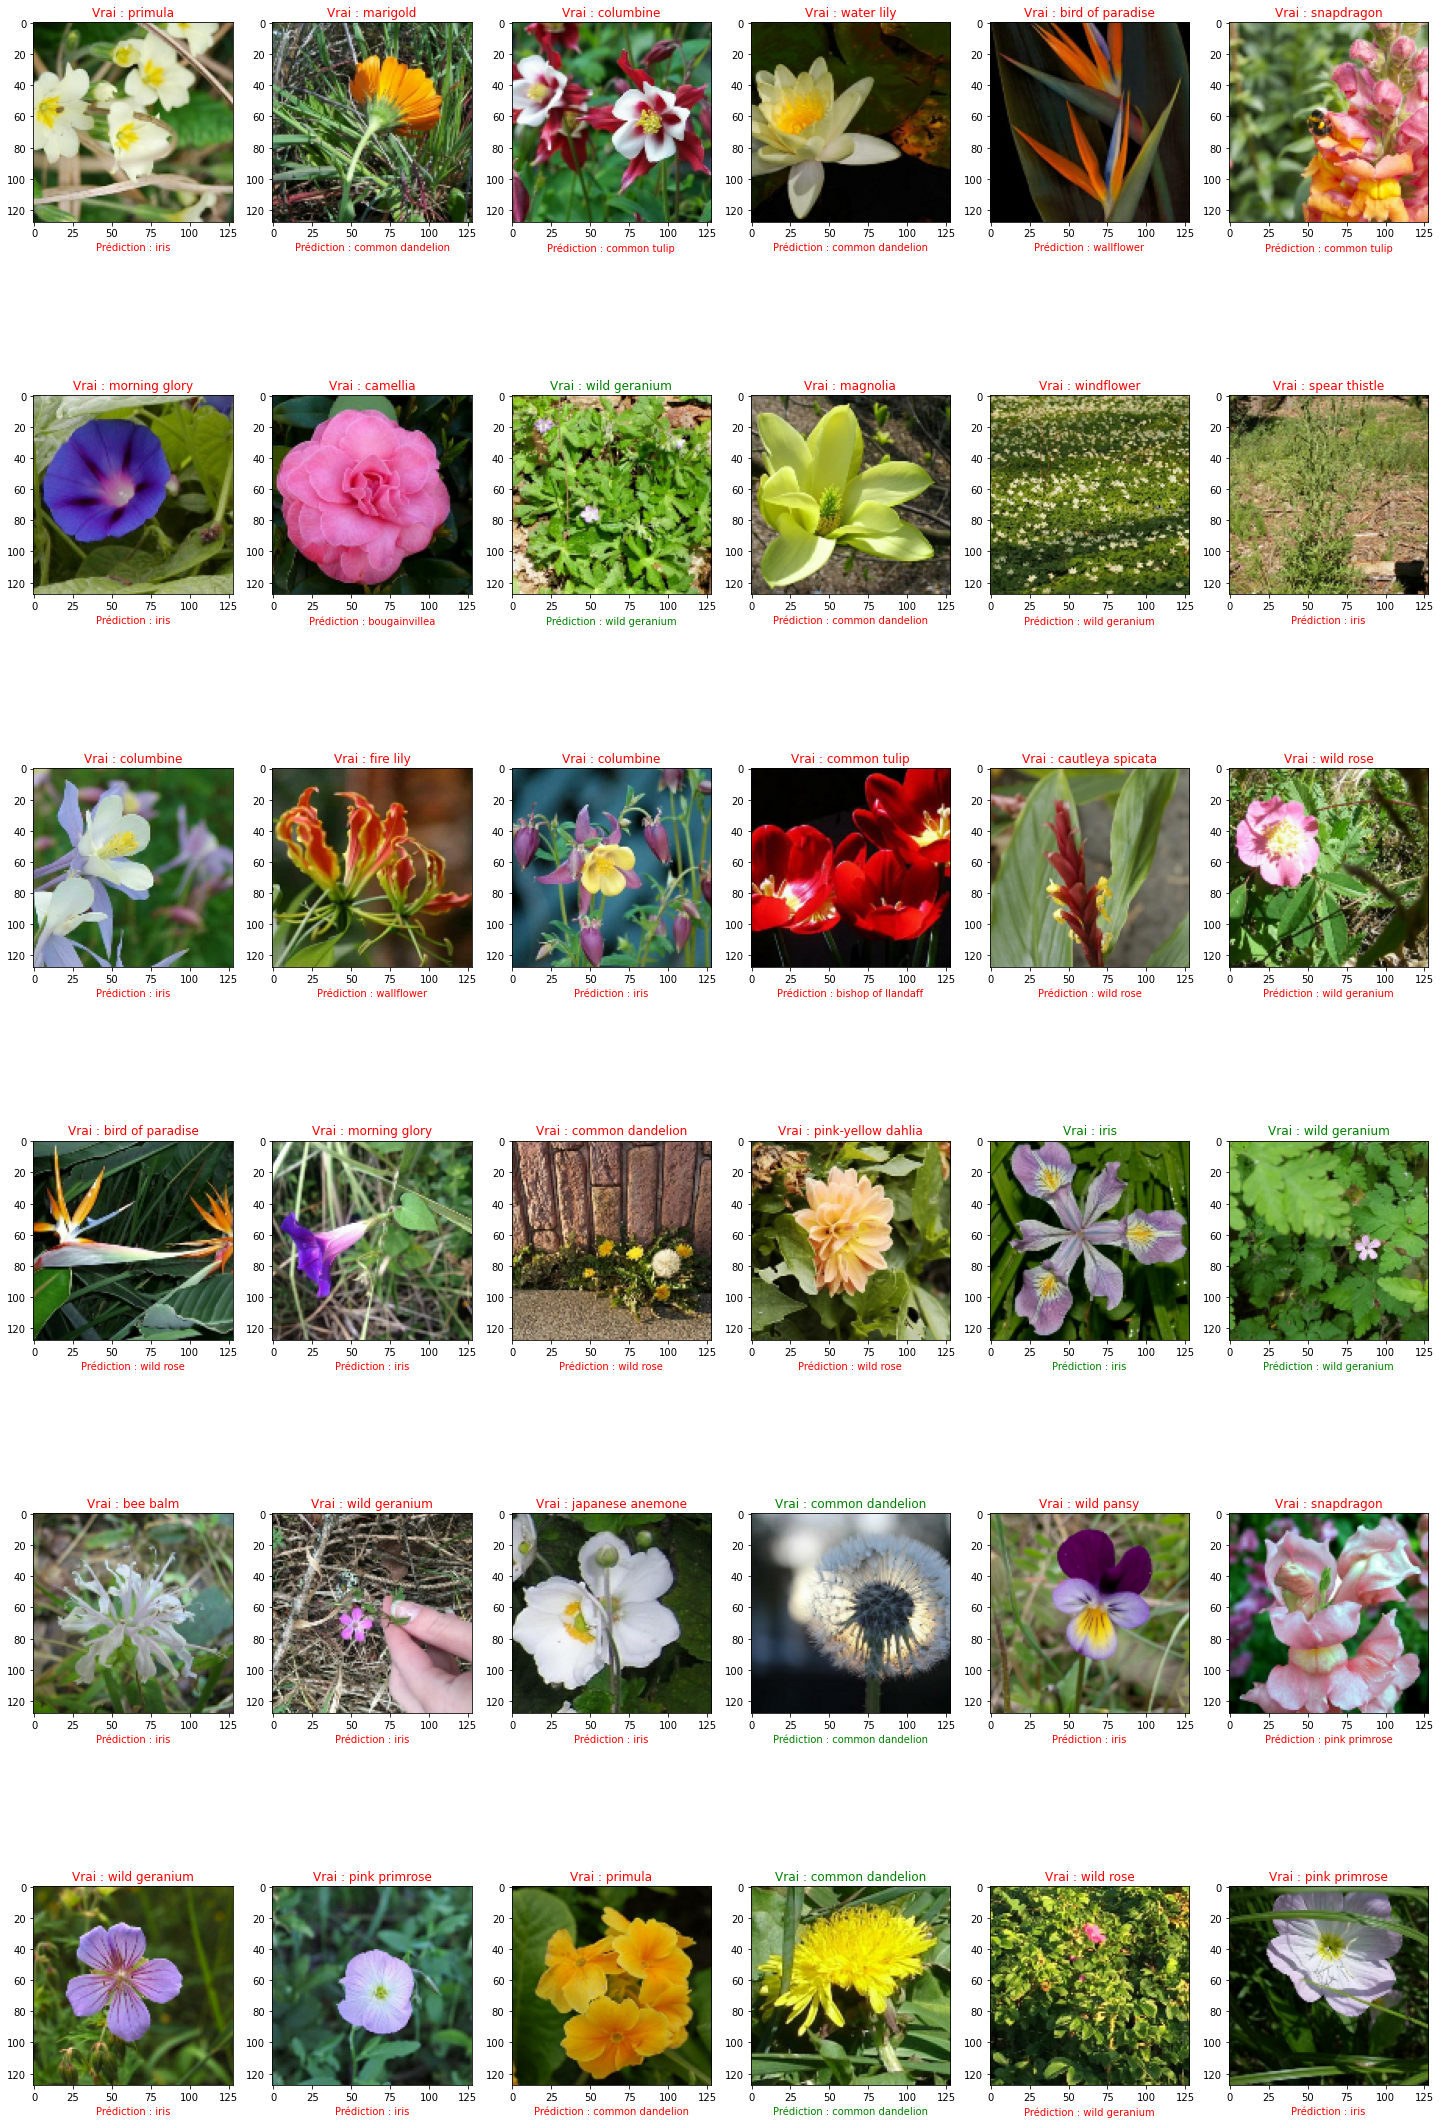

In [16]:
categories = np.sort(os.listdir(FlowerPath))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("Vrai : " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("Prédiction : " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')
        else:
            ax[i,j].set_title("Vrai : " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("Prédiction : " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')

In [17]:
model.save('modele/my_model')
del model

INFO:tensorflow:Assets written to: modele/my_model\assets


In [18]:

new_model = tf.keras.models.load_model('modele/my_model')
new_model.summary()
new_model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                  

C:\Users\Mathy\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


KeyboardInterrupt: 

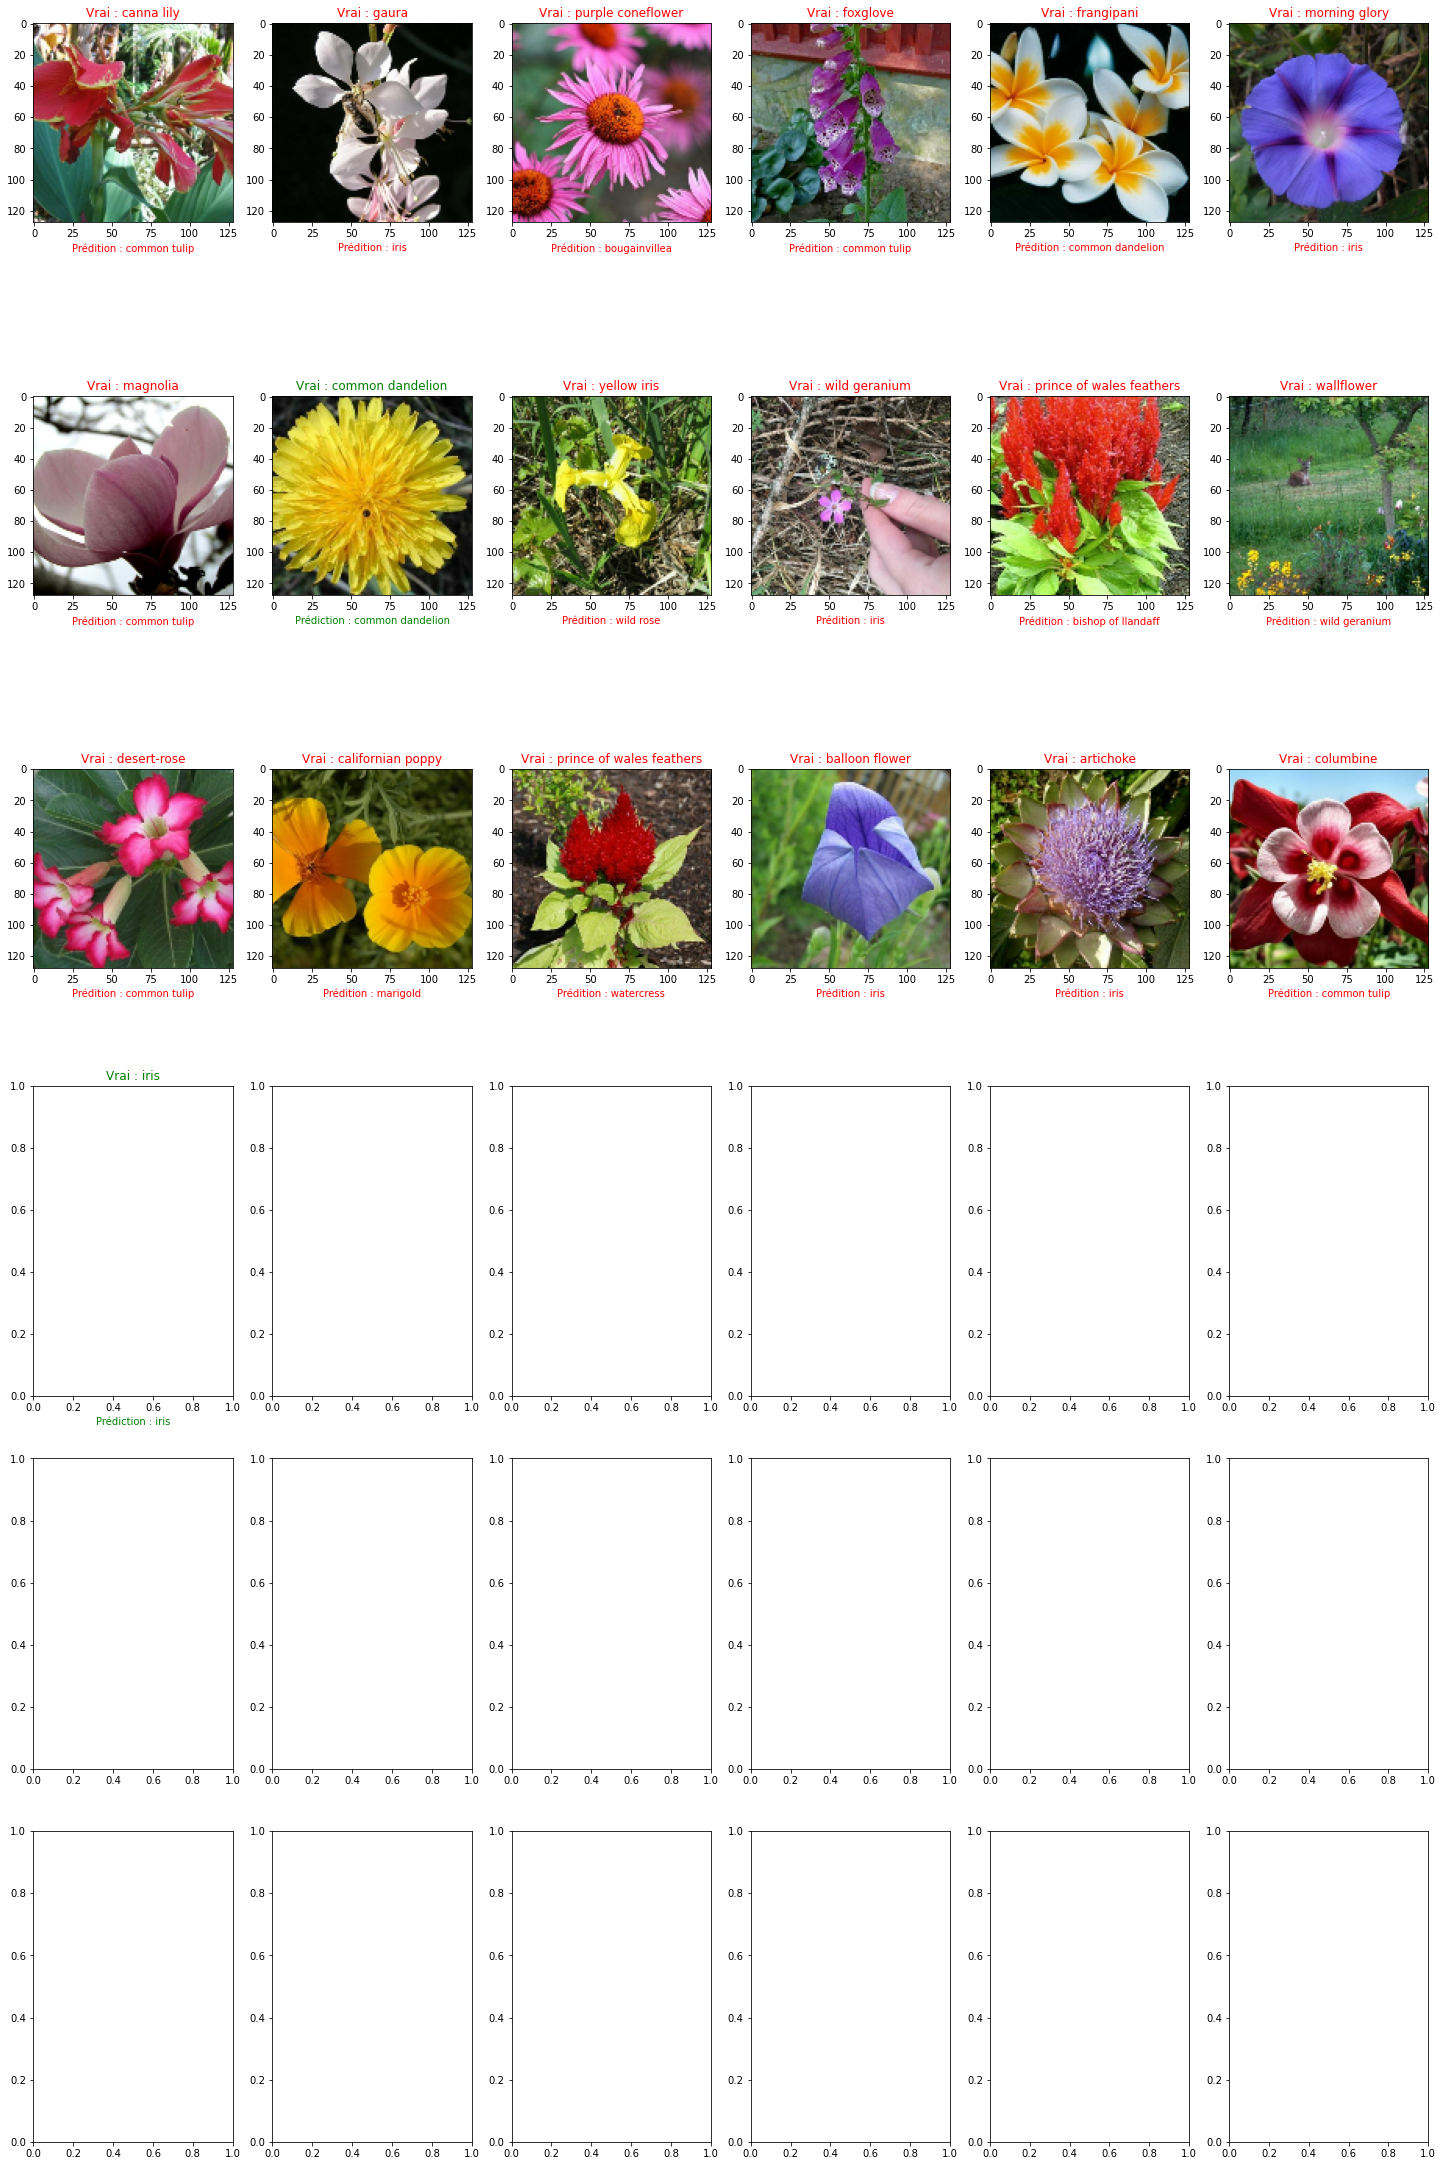

In [19]:
categories = np.sort(os.listdir(FlowerPath))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(new_model.predict(X_test)[k])]):
            ax[i,j].set_title("Vrai : " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("Prédiction : " + categories[np.argmax(new_model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')
        else:
            ax[i,j].set_title("Vrai : " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("Prédition : " + categories[np.argmax(new_model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')

In [20]:

new_model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=2

checkpoint_path = "modele/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = new_model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),   
                              verbose = 1,
                              callbacks=[cp_callback])

C:\Users\Mathy\AppData\Local\Temp/ipykernel_16992/2978059959.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = new_model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),


Epoch 1/2
157/286 [===============>..............] - ETA: 1:59 - loss: 3.7635 - accuracy: 0.1234

KeyboardInterrupt: 